In [26]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [27]:
# read data sheet 2
churn_data = pd.read_excel(r'C:\Z\Data Science\\Project\\banking-customer-churn\\Dataset\\Bank_customer_churn.xlsx', sheet_name= 2)
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,101348.9,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.6,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.6,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.8,1,_1,1,79084.1,0,0,5,GOLD,425


#### b1

In [28]:
# check shape of dataset
churn_data.shape

(10007, 18)

In [29]:
# check information 
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10007 entries, 0 to 10006
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10007 non-null  int64  
 1   CustomerId          10007 non-null  int64  
 2   Surname             10007 non-null  object 
 3   CreditScore         9998 non-null   float64
 4   Geography           10007 non-null  object 
 5   Gender              10007 non-null  object 
 6   Age                 9998 non-null   float64
 7   Tenure              10000 non-null  float64
 8   Balance             10007 non-null  object 
 9   NumOfProducts       9966 non-null   float64
 10  HasCrCard           9974 non-null   object 
 11  IsActiveMember      9984 non-null   float64
 12  EstimatedSalary     10007 non-null  object 
 13  Exited              10007 non-null  int64  
 14  Complain            10007 non-null  int64  
 15  Satisfaction Score  10007 non-null  int64  
 16  Card

In [30]:
# filter columns with null values and ascending
churn_data.isnull().sum().sort_values(ascending= False)

NumOfProducts         41
HasCrCard             33
IsActiveMember        23
CreditScore            9
Age                    9
Tenure                 7
CustomerId             0
RowNumber              0
Gender                 0
Geography              0
Balance                0
Surname                0
EstimatedSalary        0
Exited                 0
Complain               0
Satisfaction Score     0
Card Type              0
Point Earned           0
dtype: int64

In [31]:
# check duplicate of data set
churn_data.duplicated().sum()

np.int64(0)

In [32]:
# statical analytic
churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,NumOfProducts,IsActiveMember,Exited,Complain,Satisfaction Score,Point Earned
count,10007,10007,9998,9998,10000,9966,9984,10007,10007,10007,10007
mean,5004,15690915,651,39,5,2,1,0,0,3,607
std,2889,71948,97,10,3,1,0,0,0,1,226
min,1,15565701,350,18,0,1,0,0,0,1,119
25%,2502,15628472,584,32,3,1,0,0,0,2,410
50%,5004,15690695,652,37,5,1,1,0,0,3,605
75%,7506,15753222,718,44,8,2,1,0,0,4,800
max,10000,15815690,850,92,10,4,1,1,1,5,1000


#### b2

In [33]:
# drop columns not use
churn_data.drop(['RowNumber','CustomerId', 'Surname'], axis= 1, inplace= True )

loi o cot balance do co chu so trong so

In [34]:
# funcion check values in column, if it can't change value to int, it will filter number 
def fix_values(value):
    try:
        float(value)
        return value
    except:
        return ''.join([item for item in value if item in (str(i) for i in range(0, 10))])

# fix values in Balance column  
churn_data['Balance'] =churn_data['Balance'].apply(fix_values)

# fix values in HasCrCard column  
churn_data['HasCrCard'] = churn_data['HasCrCard'].apply(fix_values)

## fix values in EstimatedSalary column 
def fix_EstimatedSalary(values):
    try:
        float(values)
        return values
    except:
        match = re.findall(r"[0-9]+\-[0-9]+\-[0-9]+", str(values))
        return ''.join(match).replace('-','')
    
churn_data['EstimatedSalary'] = churn_data['EstimatedSalary'].apply(fix_EstimatedSalary)

# fix value in Card Type
def fix_text(value):
    value_change = re.findall(r'[A-Z]+', value)
    for item in value_change:
        if len(value_change) >1:
            return ''.join(value_change)
        else:
            return value_change[0]
churn_data['Card Type']=churn_data['Card Type'].apply(fix_text)

In [35]:
# fill missing value of NumofProducts column by median
churn_data['NumOfProducts'].fillna(int(churn_data['NumOfProducts'].median()), inplace= True)

# fill missing value of HasCrCard column by mode
churn_data['HasCrCard'].fillna(int(churn_data['HasCrCard'].mode()[0]), inplace= True)

# fill missing value of IsActiveMember column by mode
churn_data['IsActiveMember'].fillna(int(churn_data['IsActiveMember'].mode()[0]), inplace= True)

# fill missing value of CreditScore column by median
churn_data['CreditScore'].fillna(churn_data['CreditScore'].median(), inplace= True)

# fill missing value of Age column by median
churn_data['Age'].fillna(int(churn_data['Age'].median()), inplace= True)

# fill missing value of Tenure column by mode
churn_data['Tenure'].fillna(int(churn_data['Tenure'].median()), inplace= True)

C:\Users\TAN PHAT\AppData\Local\Temp\ipykernel_15392\3114903924.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  churn_data['NumOfProducts'].fillna(int(churn_data['NumOfProducts'].median()), inplace= True)
C:\Users\TAN PHAT\AppData\Local\Temp\ipykernel_15392\3114903924.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

In [36]:
# change dtype of Balance column to float
churn_data['Balance']=churn_data['Balance'].astype('float')

# change dtype of HasCrCard column to int
churn_data['HasCrCard']=churn_data['HasCrCard'].astype('int')

# change dtype of Age column to int
churn_data['Age']=churn_data['Age'].astype('int')

# change dtype of Tenure column to int
churn_data['Tenure']=churn_data['Tenure'].astype('int')

# change dtype of NumOfProducts column to int
churn_data['NumOfProducts']=churn_data['NumOfProducts'].astype('int')

# change dtype of IsActiveMember column to int
churn_data['IsActiveMember']=churn_data['IsActiveMember'].astype('int')

# change dtype of EstimatedSalary column to float
churn_data['EstimatedSalary']=churn_data['EstimatedSalary'].astype('float')

# change dtype of Exited column to int
churn_data['Exited']=churn_data['Exited'].astype('int')

In [37]:
pd.set_option('display.float_format', '{:.0f}'.format)
for col in churn_data.columns:
    print(f'{churn_data[col].value_counts()} \n') 

CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
358      1
412      1
382      1
373      1
419      1
Name: count, Length: 460, dtype: int64 

Geography
France     5015
Germany    2512
Spain      2480
Name: count, dtype: int64 

Gender
Male      5462
Female    4545
Name: count, dtype: int64 

Age
37    482
35    475
38    473
36    456
34    448
     ... 
84      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64 

Tenure
2     1042
1     1035
7     1028
8     1025
5     1020
3     1009
4      991
9      987
6      967
10     490
0      413
Name: count, dtype: int64 

Balance
0                 3617
29867892792723       7
141750               2
131835               2
122918               2
                  ... 
155060               1
57370                1
75075                1
130143               1
70349                1
Name: count, Length: 6372, dtype: int64 

NumOfProducts
1    5089
2    4592
3     266
4      60
Name: co

In [38]:
churn_data.sample(n= 10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
3734,796,Germany,Male,40,2,113228,2,1,1,46415,0,0,1,PLATINUM,233
7128,553,Spain,Male,38,1,181110,2,1,0,184545,0,0,4,PLATINUM,300
6073,471,Germany,Female,36,5,90064,2,1,1,96367,0,0,1,SILVER,368
8378,614,Germany,Female,37,6,96341,2,1,1,139377,1,1,2,DIAMOND,662
3039,829,Spain,Female,26,8,101440,2,1,1,19324,0,0,5,DIAMOND,596
6846,689,Spain,Female,40,5,154252,1,0,1,118320,0,0,3,PLATINUM,561
1329,743,France,Female,40,6,0,1,1,0,28281,1,1,2,PLATINUM,744
2784,821,Germany,Female,37,5,106454,2,0,1,127413,0,0,5,GOLD,798
2296,749,Germany,Male,47,9,110023,1,0,1,135655,1,1,3,GOLD,634
6656,683,Germany,Female,35,1,132371,2,0,0,186124,0,0,1,GOLD,504


#### outlier

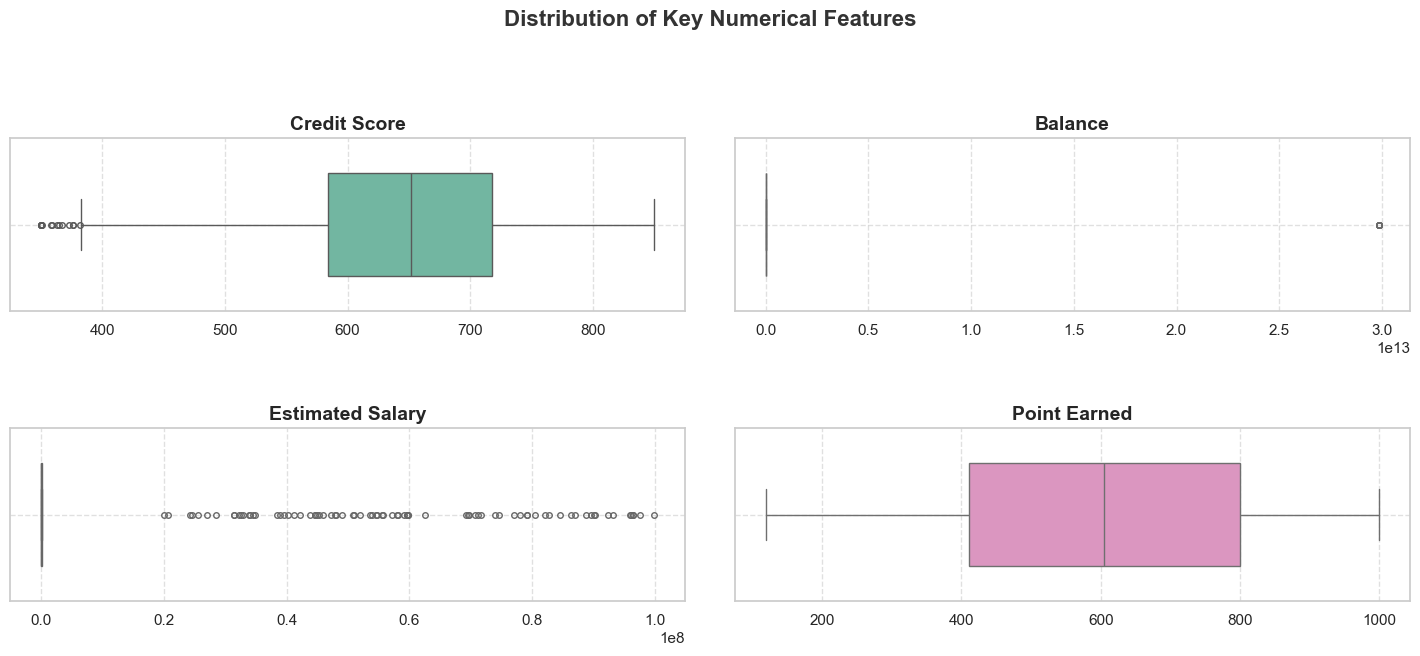

In [39]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(2, 2, figsize=(15,7))

cols = ['CreditScore', 'Balance', 'EstimatedSalary', 'Point Earned']
titles = ['Credit Score', 'Balance', 'Estimated Salary', 'Point Earned']

for i, (col, title) in enumerate(zip(cols, titles)):
    row, col_idx = divmod(i, 2)
    sns.boxplot(
        x=churn_data[col],
        ax=ax[row, col_idx],
        color=sns.color_palette("Set2")[i],
        width=0.6,
        fliersize=4  
    )
    ax[row, col_idx].set_title(title, fontsize=14, fontweight='bold')
    ax[row, col_idx].set_xlabel('')
    ax[row, col_idx].set_ylabel('')
    ax[row, col_idx].grid(True, linestyle="--", alpha=0.6)

plt.suptitle('Distribution of Key Numerical Features', fontsize=16, fontweight='bold', color='#333')
plt.tight_layout(pad=3.0)
plt.show()

In [40]:

for col in cols:
    Q1 = churn_data[col].quantile(0.25)
    Q2 = churn_data[col].quantile(0.75)
    IQR = Q2 -Q1
    duoi = Q1 - 1.5*IQR
    tren = Q2 + 1.5* IQR
    churn_data = churn_data[(churn_data[col] >= duoi) & (churn_data[col] <= tren)]

### EDA

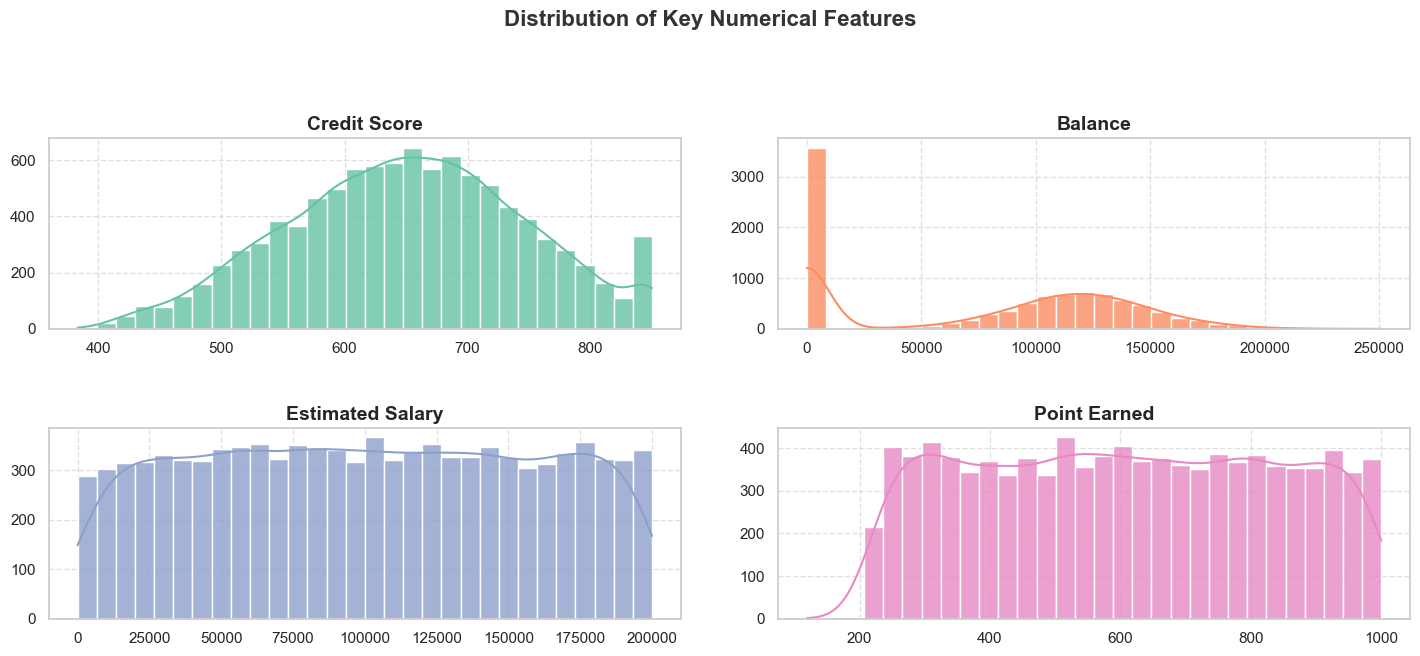

In [41]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(2, 2, figsize=(15, 7))

for i, (col, title) in enumerate(zip(cols, titles)):
    row, col_idx = divmod(i, 2)
    sns.histplot(
        x=churn_data[col],
        ax=ax[row, col_idx],
        color=sns.color_palette("Set2")[i],
        bins=30,         
        kde=True,         
        alpha=0.8         
    )
    ax[row, col_idx].set_title(title, fontsize=14, fontweight='bold')
    ax[row, col_idx].set_xlabel('')
    ax[row, col_idx].set_ylabel('')
    ax[row, col_idx].grid(True, linestyle="--", alpha=0.6)

plt.suptitle('Distribution of Key Numerical Features', fontsize=16, fontweight='bold', color='#333')
plt.tight_layout(pad=3.0)
plt.show()


C:\Users\TAN PHAT\AppData\Local\Temp\ipykernel_15392\894975270.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\TAN PHAT\AppData\Local\Temp\ipykernel_15392\894975270.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\TAN PHAT\AppData\Local\Temp\ipykernel_15392\894975270.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\TAN PHAT\AppData\Local\Temp\ipykernel_15392\894975270.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` 

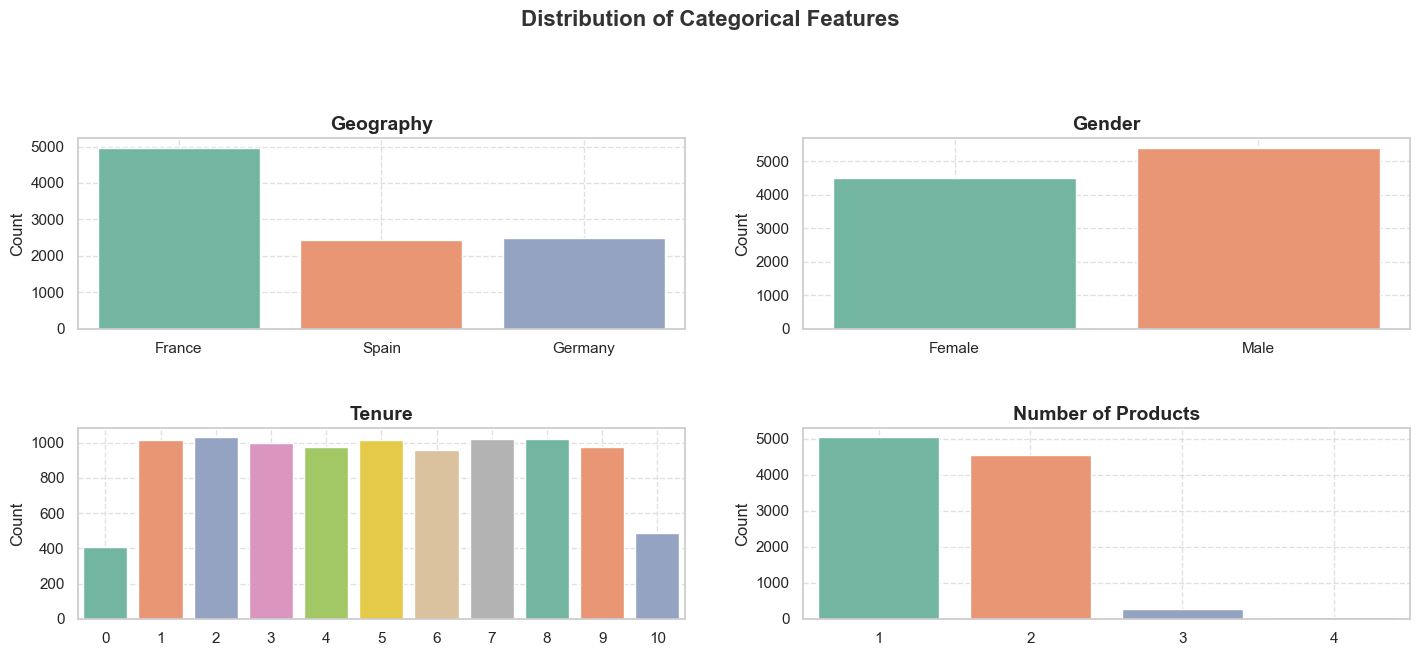

In [42]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(2, 2, figsize=(15, 7));

cols = ['Geography', 'Gender', 'Tenure', 'NumOfProducts']
titles = ['Geography', 'Gender', 'Tenure', 'Number of Products']

for i, (col, title) in enumerate(zip(cols, titles)):
    row, col_idx = divmod(i, 2)
    sns.countplot(
        x=churn_data[col],
        ax=ax[row, col_idx],
        palette="Set2"
    );
    ax[row, col_idx].set_title(title, fontsize=14, fontweight='bold')
    ax[row, col_idx].set_xlabel('')
    ax[row, col_idx].set_ylabel('Count')
    ax[row, col_idx].grid(True, linestyle="--", alpha=0.6)

plt.suptitle('Distribution of Categorical Features', fontsize=16, fontweight='bold', color='#333');
plt.tight_layout(pad=3.0);
plt.show();


C:\Users\TAN PHAT\AppData\Local\Temp\ipykernel_15392\75776037.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\TAN PHAT\AppData\Local\Temp\ipykernel_15392\75776037.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\TAN PHAT\AppData\Local\Temp\ipykernel_15392\75776037.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\TAN PHAT\AppData\Local\Temp\ipykernel_15392\75776037.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` vari

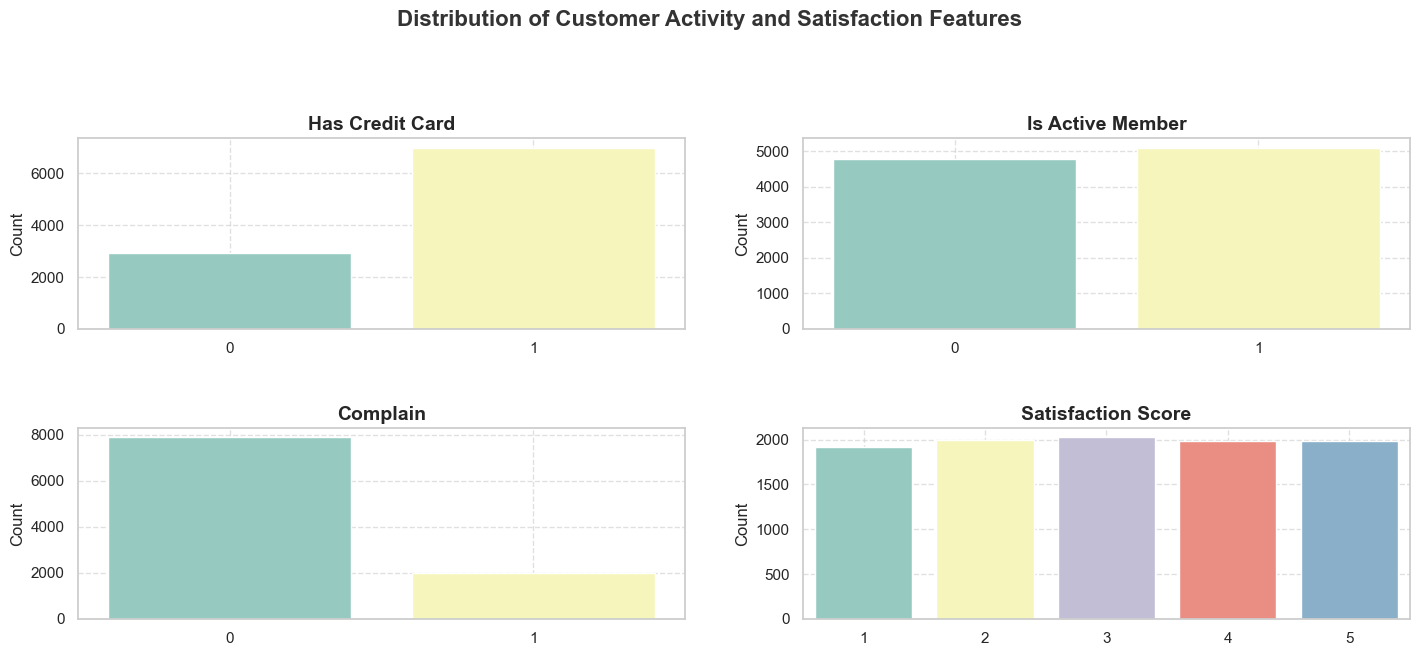

In [43]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(2, 2, figsize=(15, 7))

cols = ['HasCrCard', 'IsActiveMember', 'Complain', 'Satisfaction Score']
titles = ['Has Credit Card', 'Is Active Member', 'Complain', 'Satisfaction Score']

for i, (col, title) in enumerate(zip(cols, titles)):
    row, col_idx = divmod(i, 2)
    sns.countplot(
        x=churn_data[col],
        ax=ax[row, col_idx],
        palette="Set3"
    )
    ax[row, col_idx].set_title(title, fontsize=14, fontweight='bold')
    ax[row, col_idx].set_xlabel('')
    ax[row, col_idx].set_ylabel('Count')
    ax[row, col_idx].grid(True, linestyle="--", alpha=0.6)

plt.suptitle('Distribution of Customer Activity and Satisfaction Features', 
             fontsize=16, fontweight='bold', color='#333')
plt.tight_layout(pad=3.0)
plt.show()


C:\Users\TAN PHAT\AppData\Local\Temp\ipykernel_15392\125198839.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\TAN PHAT\AppData\Local\Temp\ipykernel_15392\125198839.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


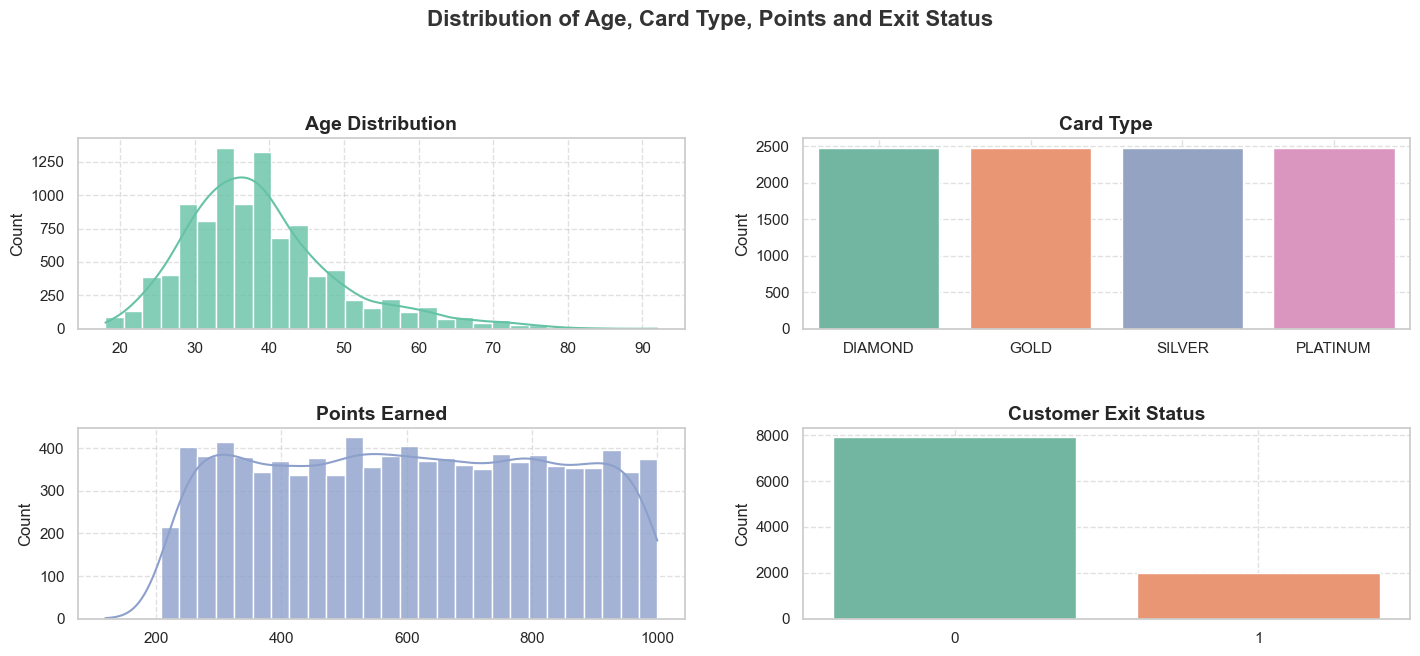

In [ ]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(2, 2, figsize=(15, 7))

cols = ['Age', 'Card Type', 'Point Earned', 'Exited']
titles = ['Age Distribution', 'Card Type', 'Points Earned', 'Customer Exit Status']

for i, (col, title) in enumerate(zip(cols, titles)):
    row, col_idx = divmod(i, 2)

    # Nếu là cột số (Age, Point Earned) → dùng histplot
    if churn_data[col].dtype in ['int64', 'float64'] and col != 'Exited':
        sns.histplot(
            x=churn_data[col],
            ax=ax[row, col_idx],
            bins=30,
            kde=True,
            color=sns.color_palette("Set2")[i],
            alpha=0.8
        )
    else:
        sns.countplot(
            x=churn_data[col],
            ax=ax[row, col_idx],
            palette="Set2"
        )

    ax[row, col_idx].set_title(title, fontsize=14, fontweight='bold')
    ax[row, col_idx].set_xlabel('')
    ax[row, col_idx].set_ylabel('Count')
    ax[row, col_idx].grid(True, linestyle="--", alpha=0.6)

plt.suptitle('Distribution of Age, Card Type, Points and Exit Status', 
             fontsize=16, fontweight='bold', color='#333')
plt.tight_layout(pad=3.0)
plt.show()
